In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types , cut_dfs_generic_Vpi0eta

Welcome to JupyROOT 6.26/04


# DRAW with respect to generic bkg

In [2]:
base_file_loc = '/media/jykim/T7/storage/Ntuples_ghi/Generic_Ntuples/ref_pre_ref_only_skim/'


phigamma_ccbar = base_file_loc + 'ccbar/recon_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_*.root'
phigamma_charged = base_file_loc + 'charged/recon_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_*.root'

In [3]:
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.68 && D0_M<2.05'

variables=['D0_M','Dstarp_CMS_p','Dstarp_delM','Dstarp_isSignal']
#,'D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','Dstarp_flightDistance','Dstarp_flightDistanceErr','D0_flightDistance','D0_flightDistanceErr','Dstarp_chiProb']
# variables += ['dM_pi0_50MeV', 'dM_pi0_75MeV']

tree='ref_omega'

In [4]:
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [5]:
pd_ccbar = pd_phigamma_ccbar.reset_index(drop=True)
pd_uubar = pd_phigamma_uubar.reset_index(drop=True)
pd_ddbar = pd_phigamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_phigamma_ssbar.reset_index(drop=True)
pd_charged = pd_phigamma_charged.reset_index(drop=True)
pd_mixed = pd_phigamma_mixed.reset_index(drop=True)
pd_taupair = pd_phigamma_taupair.reset_index(drop=True)

[499520. 497604. 496563. 496747. 495867. 494596. 492709. 493458. 491837.
 493512. 491896. 489237. 485252. 477926. 470598. 462251. 458719. 457746.
 454985. 456358. 461136. 469589. 484603. 504869. 516369. 501386. 463770.
 434892. 419164. 411674. 406414. 401449. 399747. 395719. 392348. 389352.
 385486. 382887. 379064. 375073. 371847. 368528. 364692. 360950. 358632.
 354922. 350350. 348299. 343380. 339179.]
fitst_bin_entries=499520.0


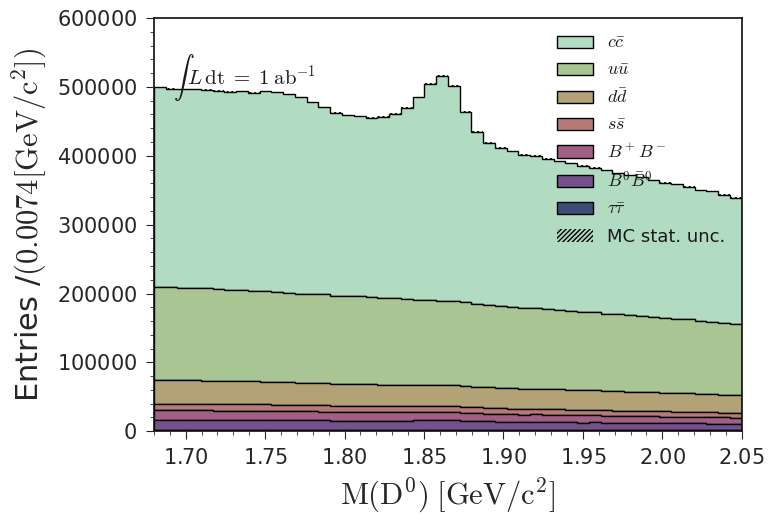

In [6]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)
# xrange = (1.75,2.0)


nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",ncol=1,luminosity='$1\\; \\mathrm{ab}^{-1}$')

plt.tight_layout()
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_pre_D0_M.png")
# plt.savefig("/media/jykim/T7/saved_plots/references/" + tree + "/cut230828_" + cut_level + " _D0_M.png")

In [18]:
cut = 'gamma_E>0.0'
cut = 'dM_pi0_75MeV  > 0.023'
cut = 'D0_M>0.0'
cut = 'abs((Dstarp_delM-0.1455))<0.0005 '
cut = 'abs((Dstarp_delM-0.1455))<0.0005 & Dstarp_CMS_p>2.5'

# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001  '
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [19]:
# cut_level = 'pre'
cut_level="delMcut"
cut_level="delMcut_DstarCMSpcut"


[17626. 17722. 18006. 18162. 18323. 18776. 18625. 19141. 19826. 20254.
 20549. 21430. 21424. 20490. 19303. 18366. 17557. 18290. 19531. 22537.
 27424. 37336. 51849. 71236. 83387. 72691. 46817. 27365. 18634. 15185.
 13703. 12784. 12728. 12591. 12351. 11997. 11898. 11694. 11500. 11231.
 11113. 10872. 10899. 10889. 10851. 10608. 10615. 10447. 10170. 10000.]
fitst_bin_entries=17626.0


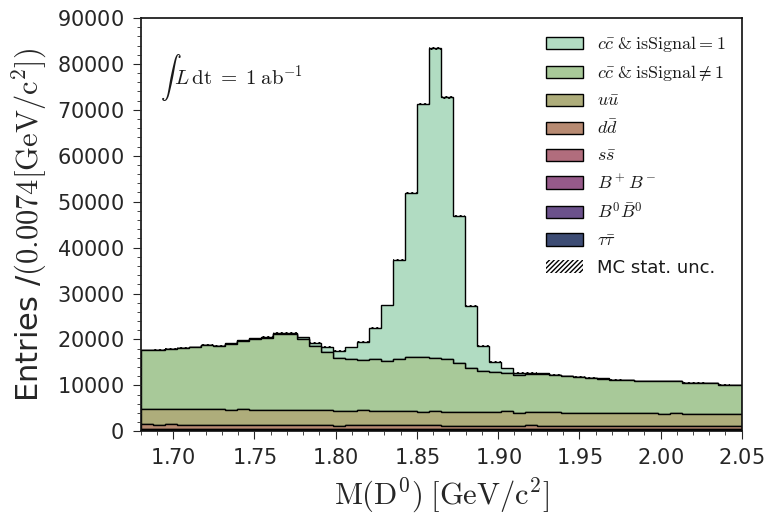

In [20]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c} \; & \;  \mathrm{isSignal}\neq 1$', r'$c\bar{c} \; & \; \mathrm{isSignal}=1$']
var = 'D0_M'
pd_signal = pd_ccbar.query('Dstarp_isSignal==1')
pd_notsignal = pd_ccbar.query('Dstarp_isSignal!=1')

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_notsignal[var], pd_signal[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.94)


nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$', ncol=1)

plt.tight_layout()

plt.savefig("/media/jykim/T7/saved_plots/references/" + tree + "/cut230828_" + cut_level + " _D0_M.png")

# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_pre_D0_M.png")
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_delMcut_D0_M_narrow_range.png")
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_delMcut_DstarCMSpcut_D0_M_narrow_range.png")

[    0.     0.     0.     0.     0.     0.     0.     0. 48036. 67895.
 64076. 60253. 57322. 53914. 50963. 48410. 45477. 42836. 40173. 37764.
 35546. 33304. 31289. 29389. 27671. 25898. 24445. 23037. 21606. 20065.
 18735. 17604. 16369. 15048. 14059. 13013. 12196. 11064. 10331.  9253.
  8263.  7241.  6401.  5621.  4525.  3447.  2321.  1112.   312.   189.]
fitst_bin_entries=0.0


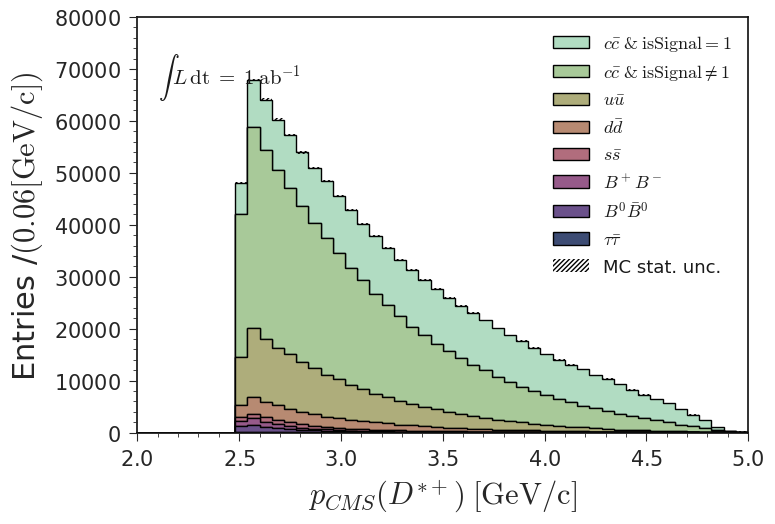

In [21]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c} \; & \;  \mathrm{isSignal}\neq 1$', r'$c\bar{c} \; & \; \mathrm{isSignal}=1$']
var = 'Dstarp_CMS_p'
pd_signal = pd_ccbar.query('Dstarp_isSignal==1')
pd_notsignal = pd_ccbar.query('Dstarp_isSignal!=1')

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_notsignal[var], pd_signal[var]]  
scale = 1
xrange = (2, 5)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$p_{CMS}(D^{*+})$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c]",luminosity='$1\\; \\mathrm{ab}^{-1}$',ncol=1,force_range=xrange)
plt.tight_layout()
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_pre_Dstarp_CMS_p.png")
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_delMcut_Dstarp_CMS_p.png")
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_delMcut_DstarCMSpcut_Dstarp_CMS_p.png")


plt.savefig("/media/jykim/T7/saved_plots/references/" + tree + "/cut230828_" + cut_level + " _Dstarp_CMS_p.png")


[2.00000e+00 2.00000e+00 1.00000e+00 0.00000e+00 8.00000e+00 9.00000e+00
 7.00000e+00 1.50000e+01 1.90000e+01 9.36210e+04 2.01864e+05 2.63578e+05
 3.10843e+05 3.52443e+05 3.89247e+05 4.25788e+05 4.62502e+05 5.06661e+05
 5.45008e+05 6.02404e+05 8.08623e+05 7.49552e+05 6.23676e+05 6.03787e+05
 5.94275e+05 5.83916e+05 5.75874e+05 5.71271e+05 5.70276e+05 5.69679e+05
 5.69096e+05 5.68871e+05 5.70122e+05 5.72014e+05 5.72527e+05 5.73479e+05
 5.73379e+05 5.74009e+05 5.75391e+05 5.73579e+05 5.73701e+05 5.73662e+05
 5.73055e+05 5.70781e+05 5.68653e+05 5.63454e+05 5.52222e+05 5.29400e+05
 4.75750e+05 3.55757e+05]
fitst_bin_entries=2.0


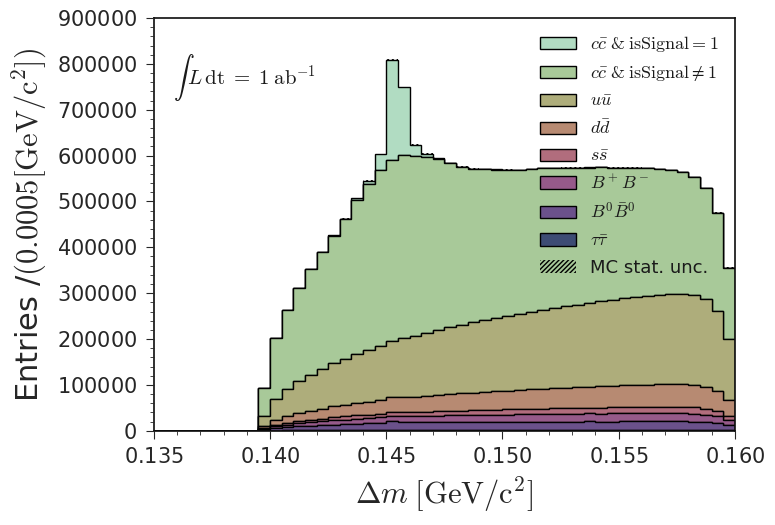

In [12]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c} \; & \;  \mathrm{isSignal}\neq 1$', r'$c\bar{c} \; & \; \mathrm{isSignal}=1$']
var = 'Dstarp_delM'
pd_signal = pd_ccbar.query('Dstarp_isSignal==1')
pd_notsignal = pd_ccbar.query('Dstarp_isSignal!=1')

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_notsignal[var], pd_signal[var]]  
scale = 1
xrange = (0.135,0.16)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\Delta m$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$', force_range=xrange,  ncol=1)
plt.tight_layout()
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_rho/cut230828_pre_Dstarp_delM.png")

plt.savefig("/media/jykim/T7/saved_plots/references/" + tree + "/cut230828_" + cut_level + " _Dstarp_delM.png")


[2.00000e+00 2.00000e+00 1.00000e+00 0.00000e+00 8.00000e+00 9.00000e+00
 7.00000e+00 1.50000e+01 1.90000e+01 9.36210e+04 2.01864e+05 2.63578e+05
 3.10843e+05 3.52443e+05 3.89247e+05 4.25788e+05 4.62502e+05 5.06661e+05
 5.45008e+05 6.02404e+05 8.08623e+05 7.49552e+05 6.23676e+05 6.03787e+05
 5.94275e+05 5.83916e+05 5.75874e+05 5.71271e+05 5.70276e+05 5.69679e+05
 5.69096e+05 5.68871e+05 5.70122e+05 5.72014e+05 5.72527e+05 5.73479e+05
 5.73379e+05 5.74009e+05 5.75391e+05 5.73579e+05 5.73701e+05 5.73662e+05
 5.73055e+05 5.70781e+05 5.68653e+05 5.63454e+05 5.52222e+05 5.29400e+05
 4.75750e+05 3.55757e+05]
fitst_bin_entries=2.0


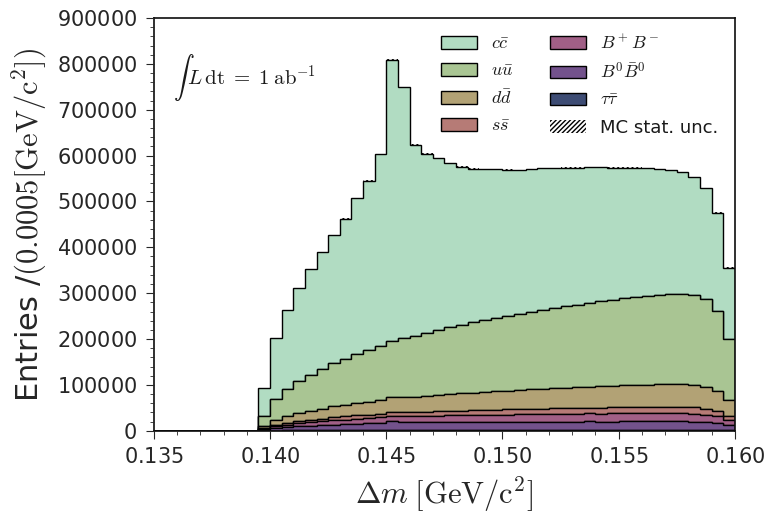

In [13]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
xrange = (0.135,0.16)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\Delta m$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$' , force_range=xrange)